#Laptops Price Dataset
This dataset provides a comprehensive collection of information on various laptops, enabling a detailed analysis of their specifications and pricing. It encompasses a wide range of laptops, encompassing diverse brands, models, and configurations, making it a valuable resource for researchers, data analysts, and machine learning enthusiasts interested in the laptop industry.

The data comes from the spanish website PC componentes. The data was collected using Power Automate, more info on: https://github.com/juanmerino89/laptops-data-cleaning

####Fields included:

**Laptop Name**: The unique identifier or model name of the laptop.
**Brand**: Laptop brand.
**Model**: Laptop brand model.
**CPU (Central Processing Unit)**: The processor brand, model, and other relevant details.
**GPU (Graphics Processing Unit)**: The graphics card brand, model, and associated specifications.
**RAM (Random Access Memory)**: The amount of memory available for multitasking.
**Storage**: The storage type (HDD, SSD) and capacity of the laptop.
Price: The cost of the laptop in the respective currency.
By utilizing this dataset, researchers and analysts can explore patterns, trends, and relationships between laptop specifications and their pricing. It serves as an excellent resource for tasks such as price prediction, market analysis, and comparison of different laptop configurations. Whether you are interested in identifying the most cost-effective options or understanding the impact of specific hardware components on laptop prices, this dataset offers abundant possibilities for in-depth exploration.

##Question 1
####Import the libraries and extract the dataset from zipped file.

In [88]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


##Question 2
####Import the dataset - 'laptops.csv'

In [ ]:
!pwd


/content


In [ ]:
# read data
train_data = pd.read_csv('/content/laptops.csv')

# check that we loaded data correctly
print("Train data shape:", train_data.shape)


Train data shape: (2160, 12)


In [ ]:
train_data

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


##Question 3
####Perform EDA on the datsaet to understand the data.

In [42]:
# remove Laptop and model
train_data_trimmed = train_data.drop(['Laptop', 'Brand'], axis=1)

In [74]:
train_data_trimmed.isna().sum()

Status             0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [76]:
train_data_trimmed['GPU'].fillna('Integrated',inplace=True)


In [75]:
train_data_trimmed.drop(train_data_trimmed.loc[train_data_trimmed['Screen'].isna()].index,axis=0,inplace=True)


In [77]:
train_data_trimmed.drop(train_data_trimmed.loc[train_data_trimmed['Storage type'].isna()].index,axis=0,inplace=True)


In [81]:
y = train_data_trimmed['Final Price']
X = train_data_trimmed.drop(["Final Price"], axis=1)


In [82]:
X.columns

Index(['Status', 'Model', 'CPU', 'RAM', 'Storage', 'Storage type', 'GPU',
       'Screen', 'Touch'],
      dtype='object')

<Axes: >

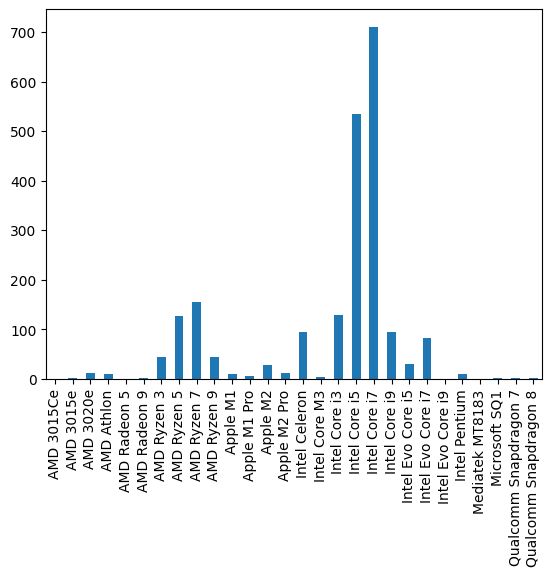

In [43]:
label_counts  = train_data_trimmed["CPU"].value_counts().sort_index()
label_counts.plot.bar()


In [ ]:
train_data["RAM"].value_counts()

16     928
8      817
32     301
4       68
64      25
12      15
6        3
40       2
128      1
Name: RAM, dtype: int64

<Axes: >

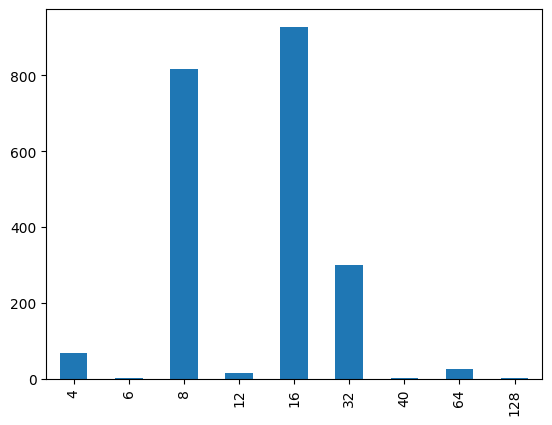

In [27]:
label_counts  = train_data["RAM"].value_counts().sort_index()
label_counts.plot.bar()


<Axes: >

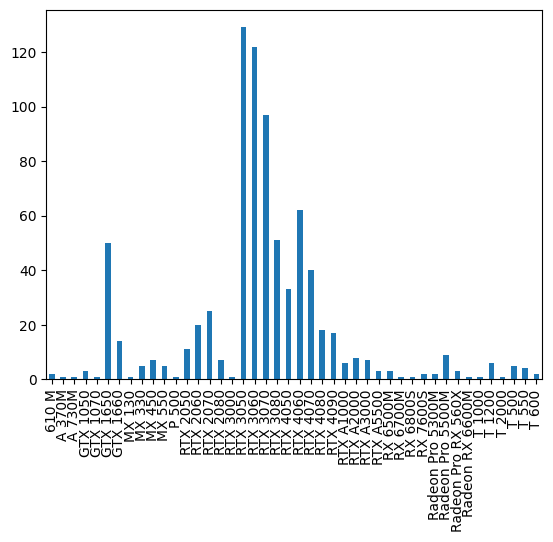

In [28]:
# Price vs CPU
label_counts  = train_data["GPU"].value_counts().sort_index()
label_counts.plot.bar()

<Axes: >

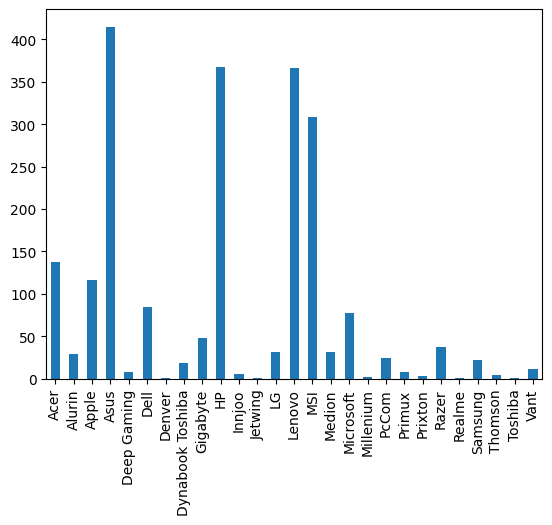

In [29]:
label_counts  = train_data["Brand"].value_counts().sort_index()
label_counts.plot.bar()

In [37]:
train_data.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

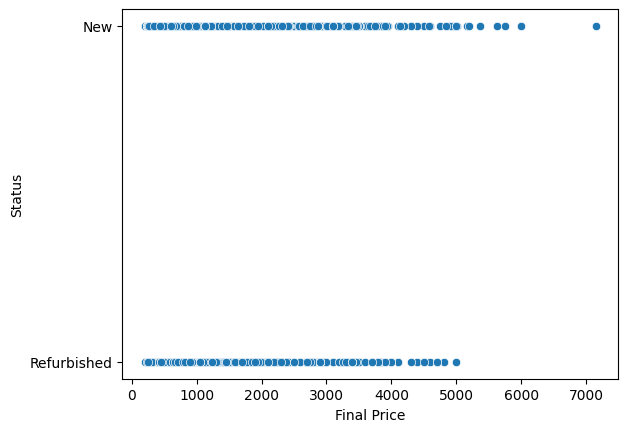

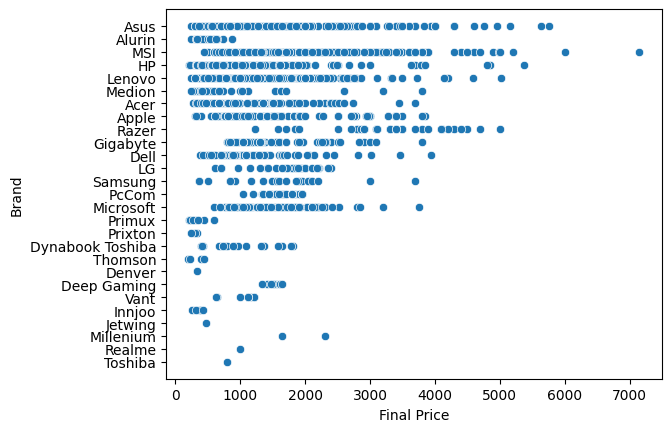

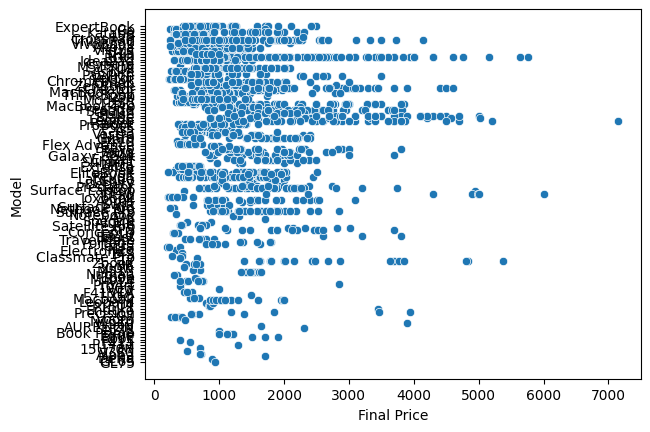

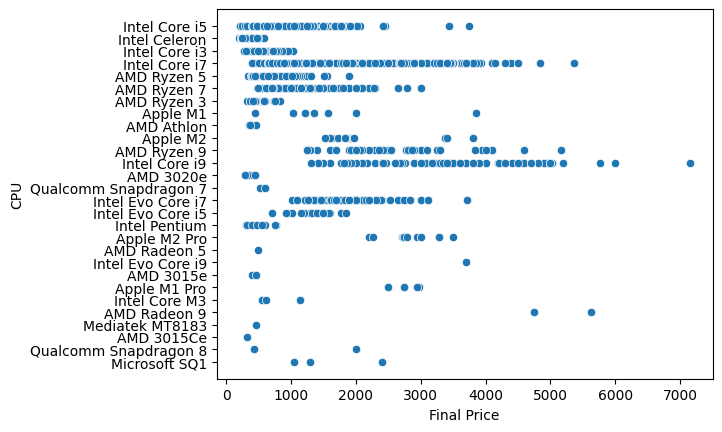

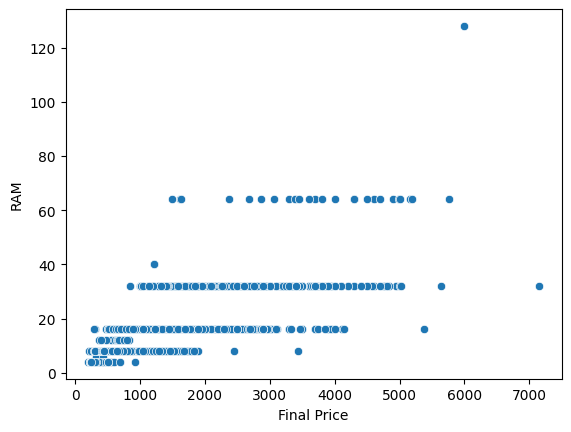

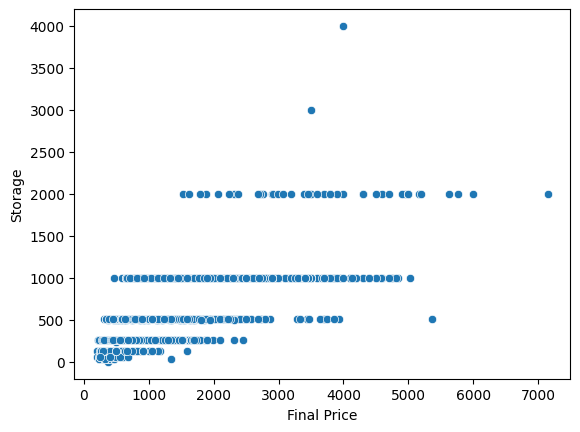

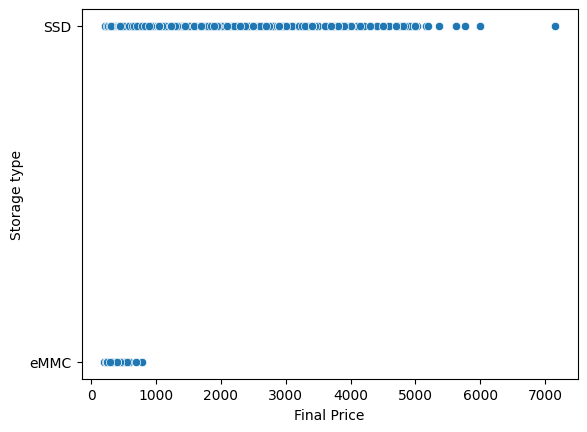

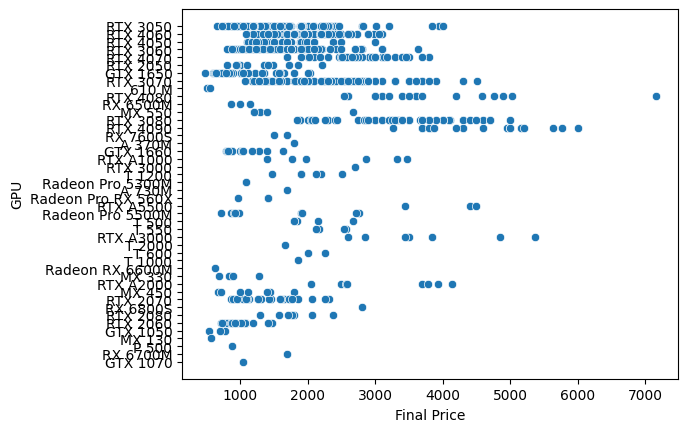

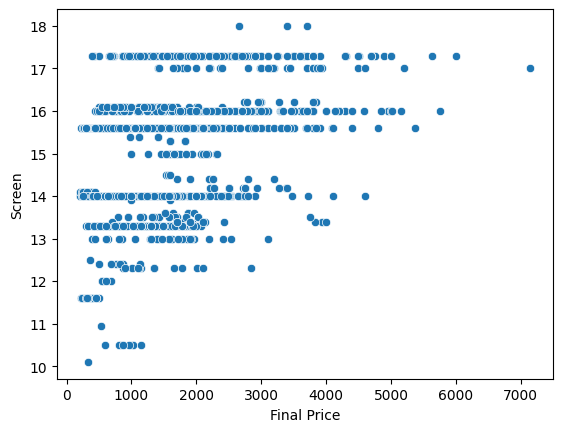

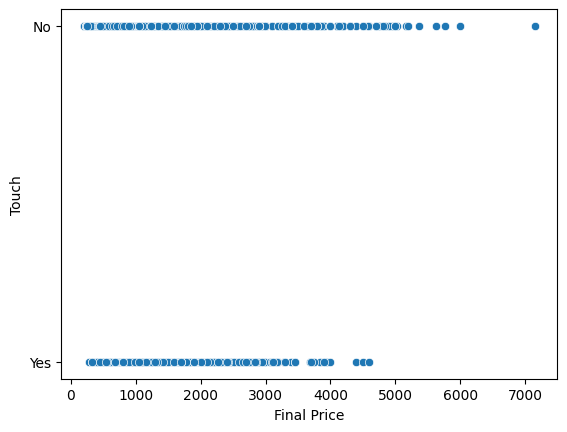

In [39]:
for col in ['Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch']:
       sns.scatterplot(data=train_data, x="Final Price", y=col)
       plt.show()

<Axes: >

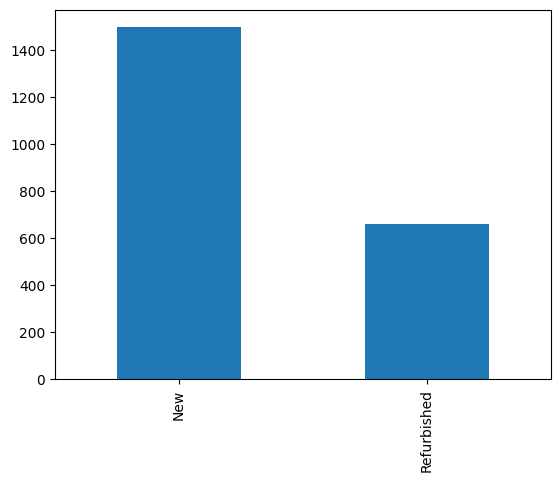

In [32]:
label_counts  = train_data["Status"].value_counts().sort_index()
label_counts.plot.bar()


<Axes: >

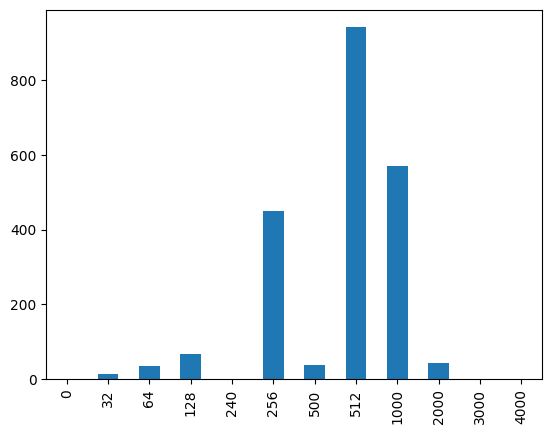

In [33]:
label_counts  = train_data["Storage"].value_counts().sort_index()
label_counts.plot.bar()

In [80]:
train_data_trimmed.isna().sum()


Status          0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

<Axes: >

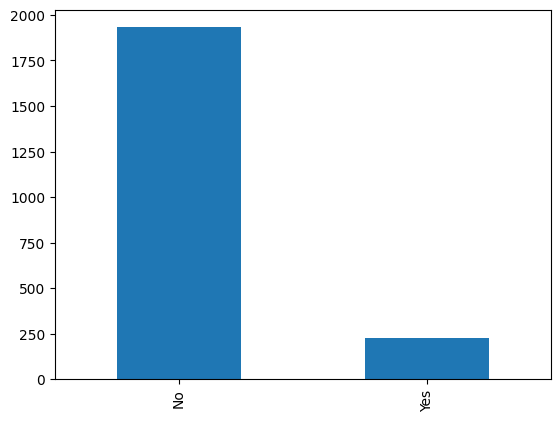

In [34]:
label_counts  = train_data["Touch"].value_counts().sort_index()
label_counts.plot.bar()

<Axes: xlabel='Final Price', ylabel='Touch'>

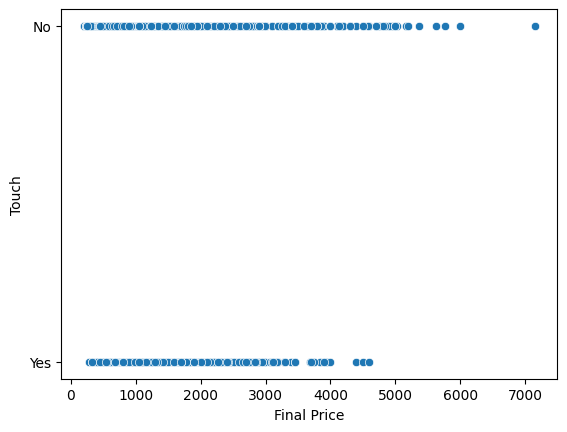

In [36]:
sns.scatterplot(data=train_data, x="Final Price", y="Touch")

<ipython-input-41-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,RAM,Storage,Screen,Final Price
RAM,1.000000,0.751297,0.361404,0.724946
Storage,0.751297,1.000000,0.398025,0.695631
Screen,0.361404,0.398025,1.000000,0.268359
Final Price,0.724946,0.695631,0.268359,1.000000


In [83]:
# Label encode
labelencoder = LabelEncoder()
X[['Status', 'Model', 'CPU', 'RAM', 'Storage', 'Storage type', 'GPU','Screen', 'Touch']] = X[['Status', 'Model', 'CPU', 'RAM', 'Storage', 'Storage type', 'GPU','Screen', 'Touch']].apply(labelencoder.fit_transform)

In [84]:
X

,Status,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch
0,0,41,16,2,6,0,7,21,0
1,0,53,13,2,4,0,7,21,0
2,0,41,15,2,4,0,7,21,0
3,0,57,17,4,7,0,18,21,0
4,0,4,16,4,6,0,7,21,0
...,...,...,...,...,...,...,...,...,...
2155,1,21,17,4,7,0,19,26,0
2156,1,21,17,4,7,0,20,26,0
2157,1,21,17,5,7,0,21,26,0
2158,1,22,20,4,7,0,7,9,1


In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114 entries, 0 to 2159
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Status        2114 non-null   int64
 1   Model         2114 non-null   int64
 2   CPU           2114 non-null   int64
 3   RAM           2114 non-null   int64
 4   Storage       2114 non-null   int64
 5   Storage type  2114 non-null   int64
 6   GPU           2114 non-null   int64
 7   Screen        2114 non-null   int64
 8   Touch         2114 non-null   int64
dtypes: int64(9)
memory usage: 165.2 KB


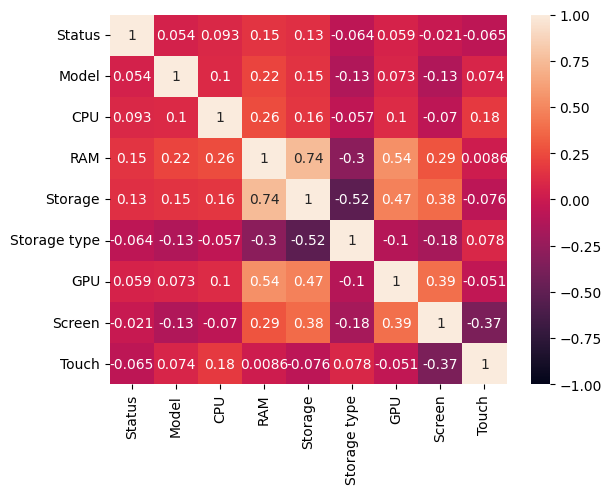

In [86]:
sns.heatmap(X.corr(),vmin=-1, vmax=1, annot=True);


##Question 4
####Extract the information to train the model from the dataset.

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
y_train.info

<bound method Series.info of 1776     699.00
381      399.00
1242     909.99
1805    1271.09
1865    1045.94
         ...   
1638    1838.29
1095     531.80
1130     765.33
1294     803.61
860     2102.18
Name: Final Price, Length: 1728, dtype: float64>

In [90]:
def build_model():
    model=keras.Sequential()
    model.add(keras.Input(shape=(X.shape[1],)))
    model.add(keras.layers.Dense(16,activation='relu'))
    model.add(keras.layers.Dense(8,activation='relu'))
    model.add(keras.layers.Dense(1,activation='linear'))

    opt=keras.optimizers.Adam(1e-1)
    model.compile(optimizer=opt,loss=keras.losses.MeanSquaredError())
    return model

##Question 5
####Train the FNN model.

In [91]:
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [92]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,verbose=1,restore_best_weights=True)
lr_scheduler=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.5,min_lr=1e-5)

In [94]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=400,batch_size=64,callbacks=[early_stop,lr_scheduler])

Epoch 1/400
27/27 [==============================] - 2s 11ms/step - loss: 973170.1250 - val_loss: 498887.7188 - lr: 0.1000
Epoch 2/400
27/27 [==============================] - 0s 4ms/step - loss: 516065.3438 - val_loss: 416638.3438 - lr: 0.1000
Epoch 3/400
27/27 [==============================] - 0s 4ms/step - loss: 468135.5938 - val_loss: 391722.0625 - lr: 0.1000
Epoch 4/400
27/27 [==============================] - 0s 3ms/step - loss: 433764.7812 - val_loss: 357288.7500 - lr: 0.1000
Epoch 5/400
27/27 [==============================] - 0s 4ms/step - loss: 414213.9062 - val_loss: 403818.7500 - lr: 0.1000
Epoch 6/400
27/27 [==============================] - 0s 4ms/step - loss: 408742.7500 - val_loss: 334946.1250 - lr: 0.1000
Epoch 7/400
27/27 [==============================] - 0s 4ms/step - loss: 386275.4688 - val_loss: 334364.8125 - lr: 0.1000
Epoch 8/400
27/27 [==============================] - 0s 4ms/step - loss: 388708.4375 - val_loss: 327108.6875 - lr: 0.1000
Epoch 9/400
27/27 [====

##Question 6
####Plot the train loss vs Validation loss.

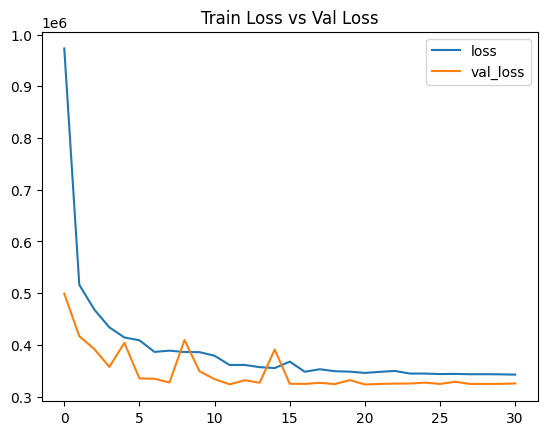

In [95]:
#Solution 6(your code here)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.title('Train Loss vs Val Loss')
plt.show()

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
preds=model.predict(X_test)
mse=mean_squared_error(y_test,preds)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,preds)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

14/14 [==============================] - 0s 1ms/step
Mean Squared Error: 323274.8159764529
Root Mean Squared Error: 568.5726127562361
Mean Absolute Error: 382.2822731483405
